<a href="https://colab.research.google.com/github/vikasrkarjigi/realtime-stock-analytics-kafka/blob/main/kafka_stock_analysis_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Data visualization:**

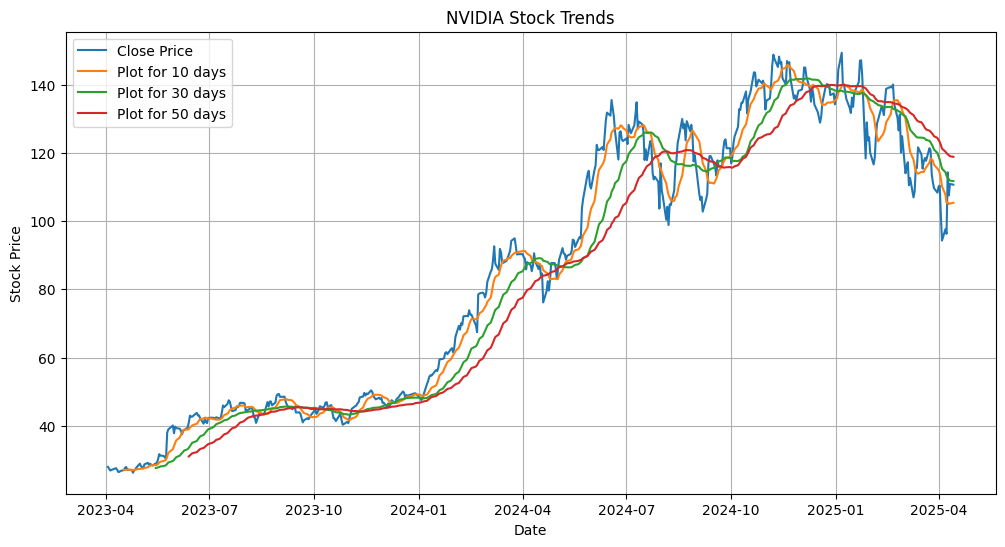

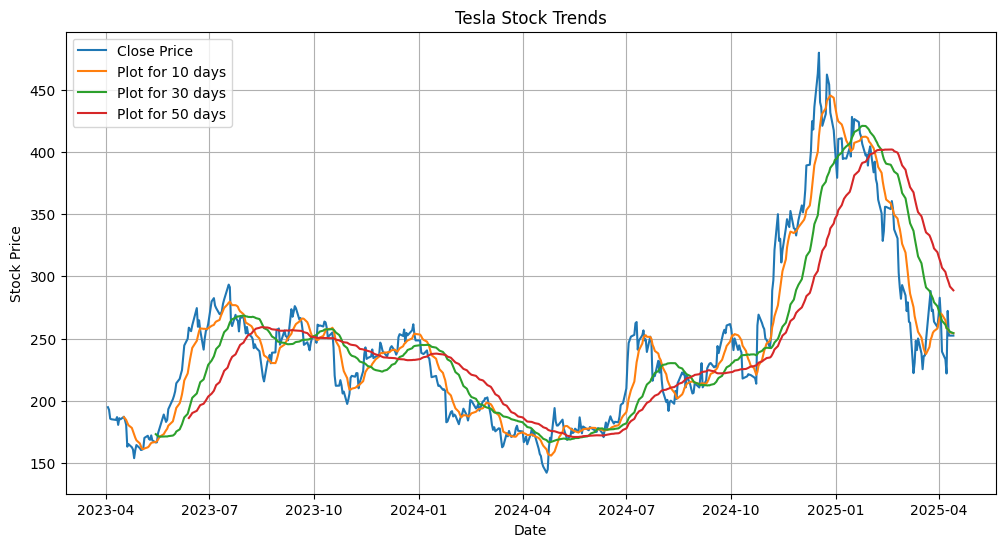

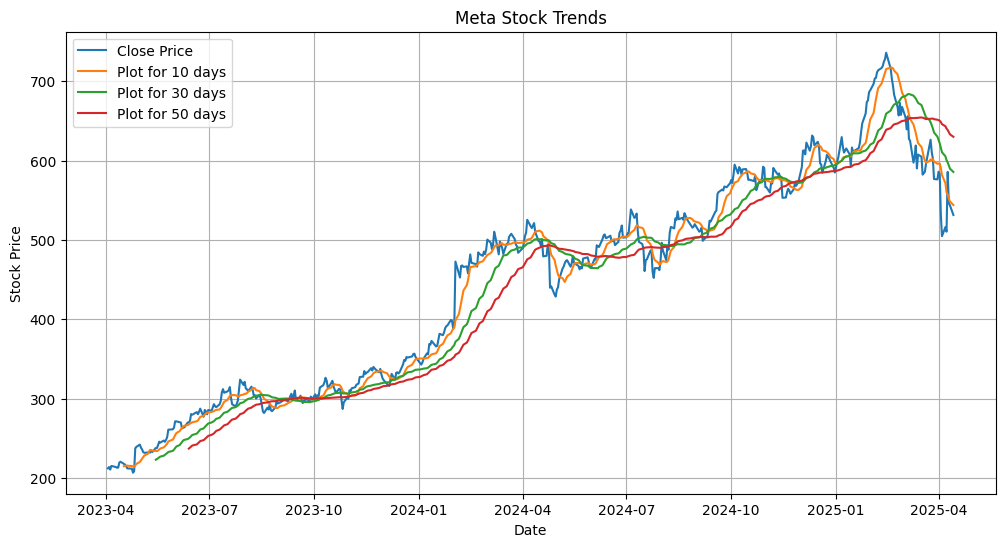

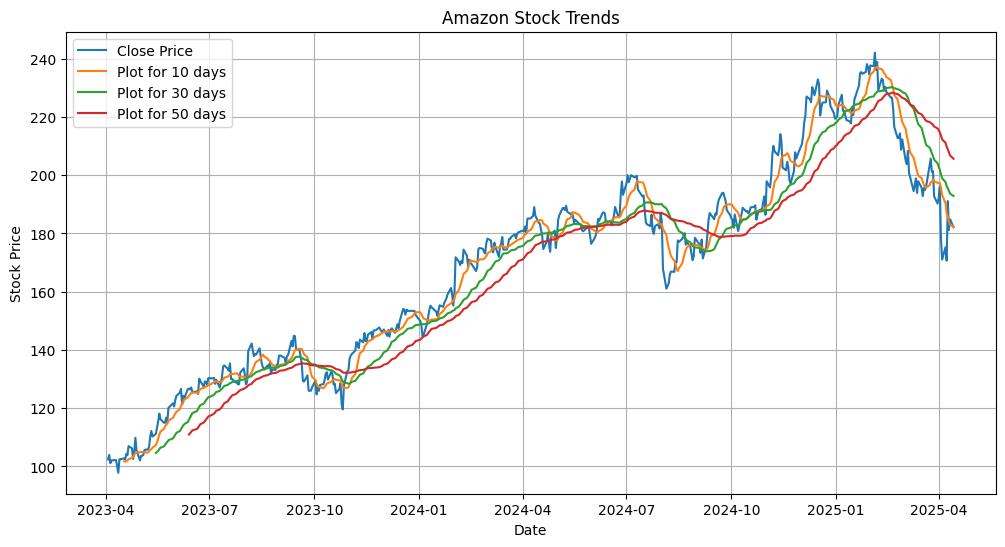

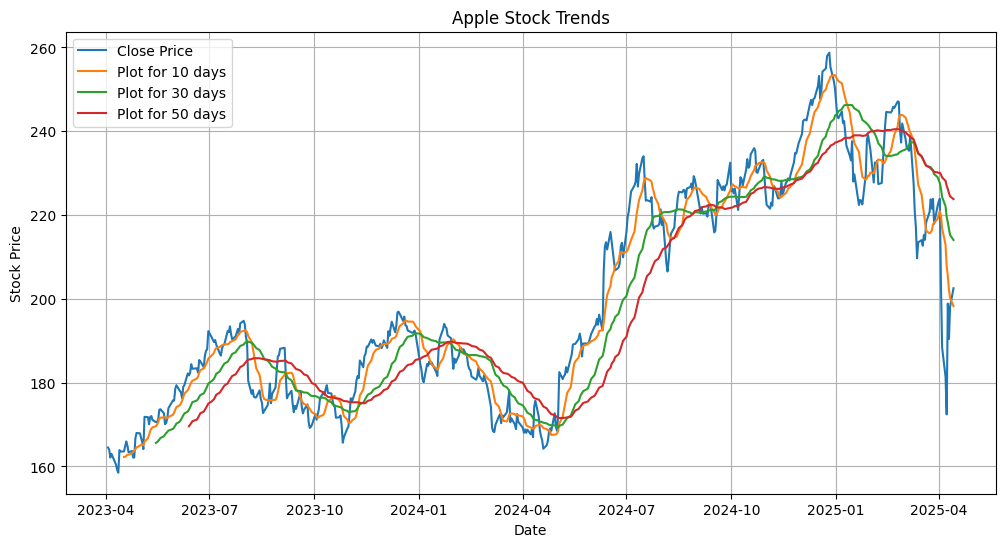

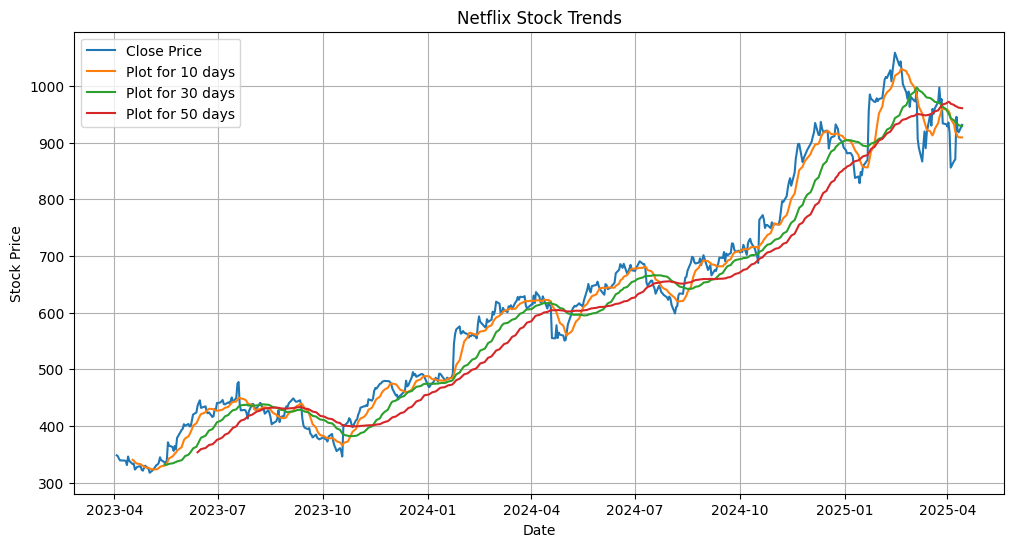

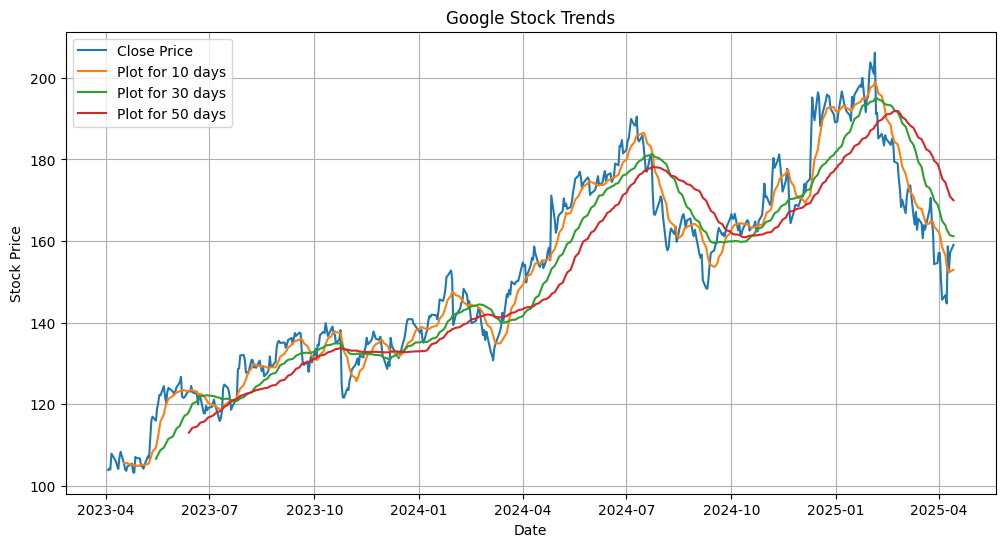

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load CSV from GitHub
csv_url = 'https://raw.githubusercontent.com/vikasrkarjigi/realtime-stock-analytics-kafka/refs/heads/main/stock_data_april2023_to_apr2025.csv'
result_df = pd.read_csv(csv_url)

# Preview to confirm
result_df.head()

# Convert 'Date' column to datetime
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Ticker to company name mapping
tickers = {
    'NVDA': 'NVIDIA',
    'TSLA': 'Tesla',
    'META': 'Meta',
    'AMZN': 'Amazon',
    'AAPL': 'Apple',
    'NFLX': 'Netflix',
    'GOOGL': 'Google'
}

# Function to generate rolling average plots
def plot_stock_trends(df, company_name):
    company_df = df[df['Company Name'] == company_name].copy()
    company_df.sort_values('Date', inplace=True)
    company_df.set_index('Date', inplace=True)

    company_df['MA10'] = company_df['Close'].rolling(window=10).mean()
    company_df['MA30'] = company_df['Close'].rolling(window=30).mean()
    company_df['MA50'] = company_df['Close'].rolling(window=50).mean()

    plt.figure(figsize=(12,6))
    plt.plot(company_df['Close'], label='Close Price')
    plt.plot(company_df['MA10'], label='Plot for 10 days')
    plt.plot(company_df['MA30'], label='Plot for 30 days')
    plt.plot(company_df['MA50'], label='Plot for 50 days')
    plt.title(f'{company_name} Stock Trends')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Loop through all companies in your tickers dict
for ticker, company in tickers.items():
    plot_stock_trends(result_df, company)


# **2. Stock Price Trend using Seaborn:**

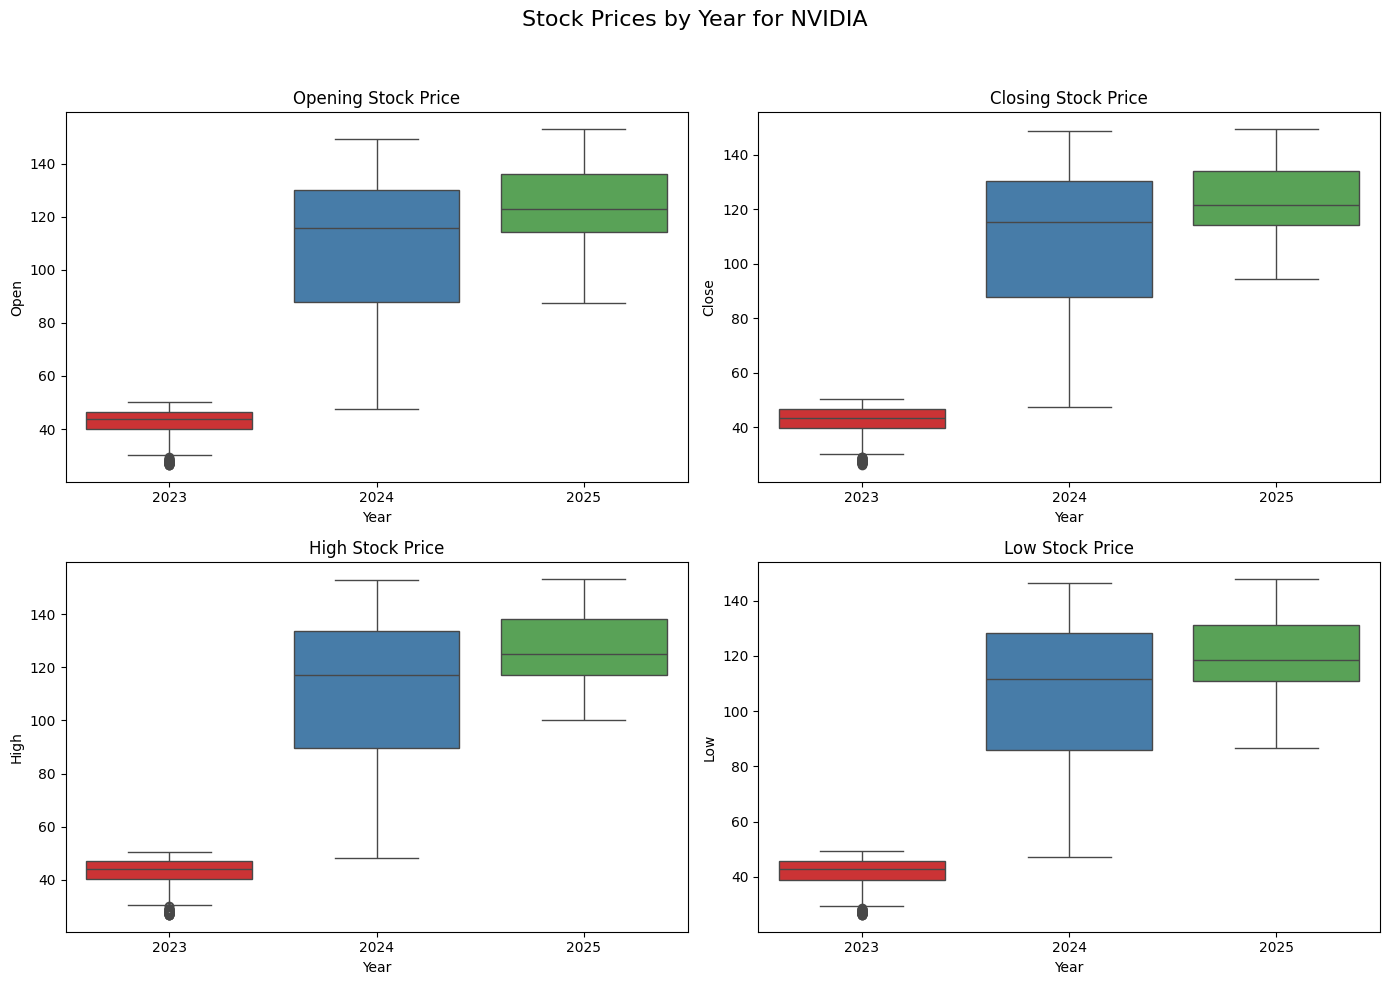

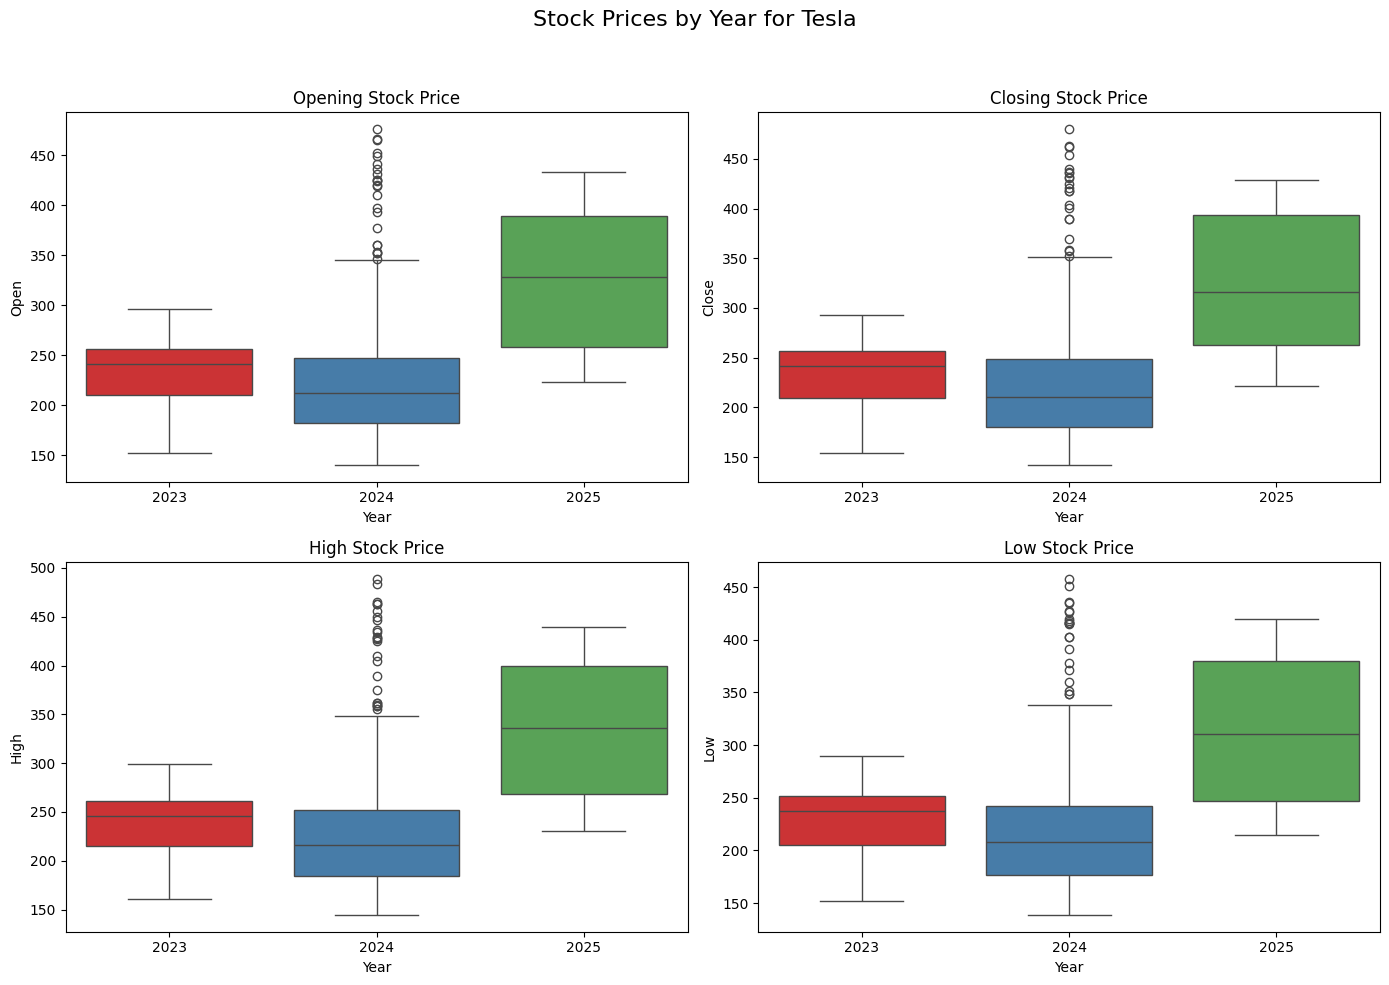

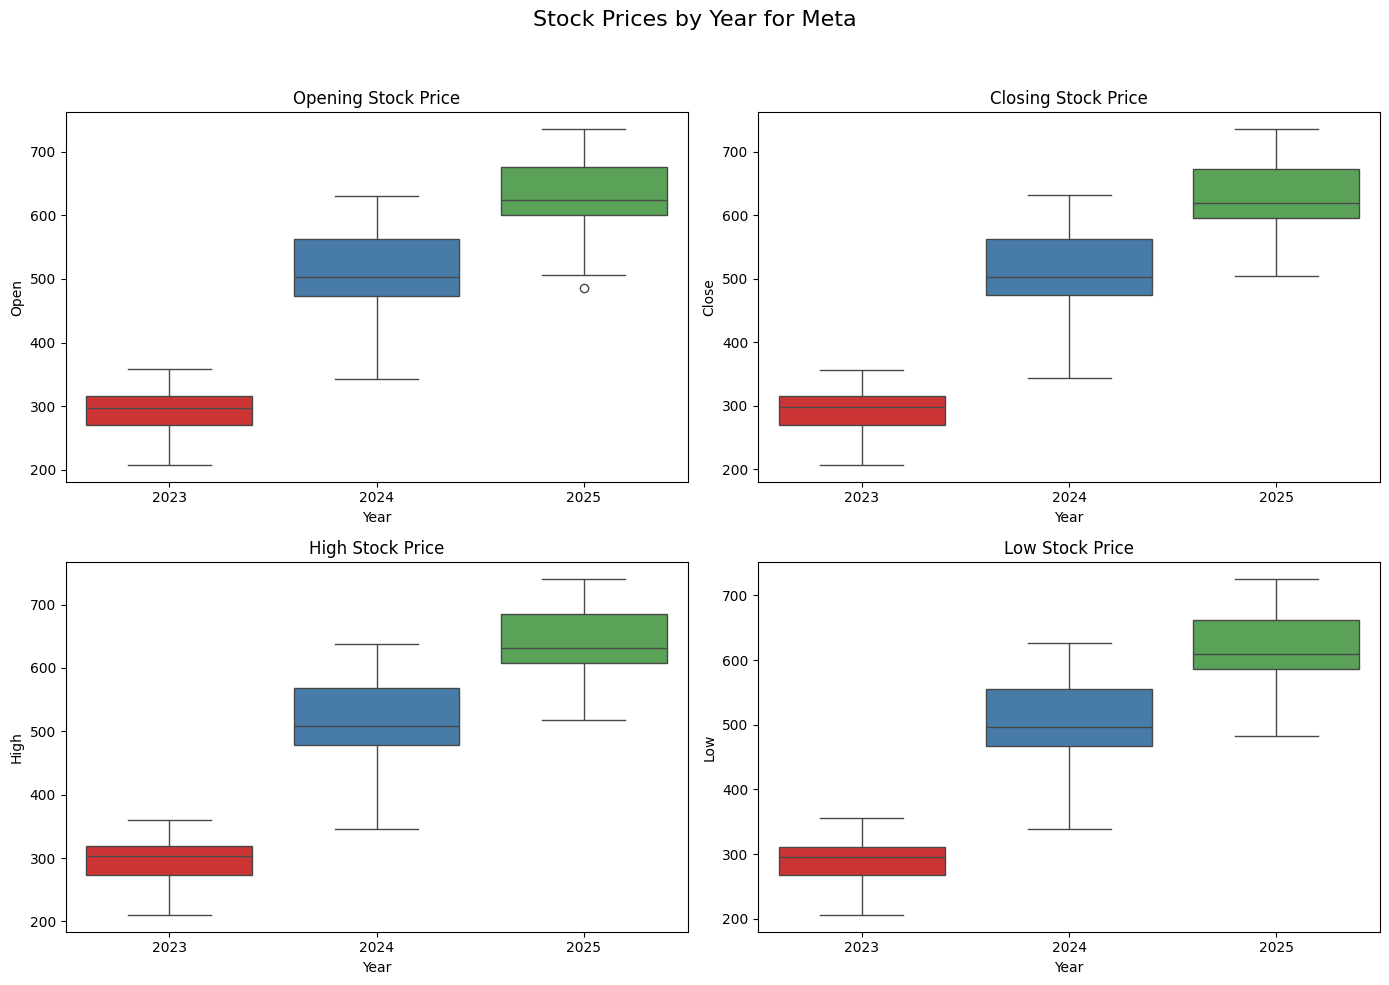

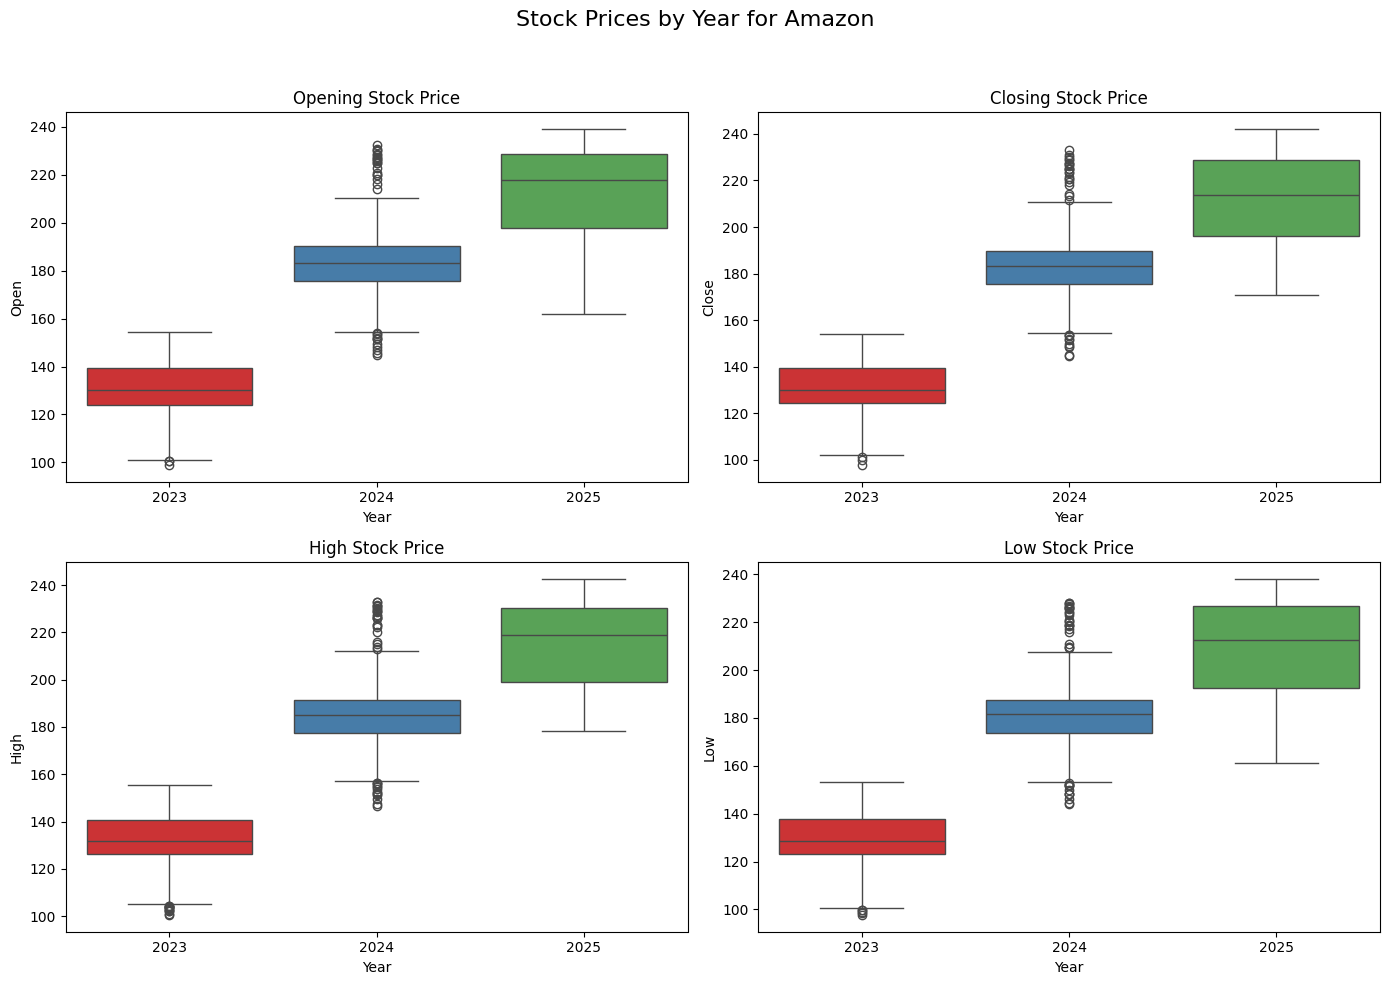

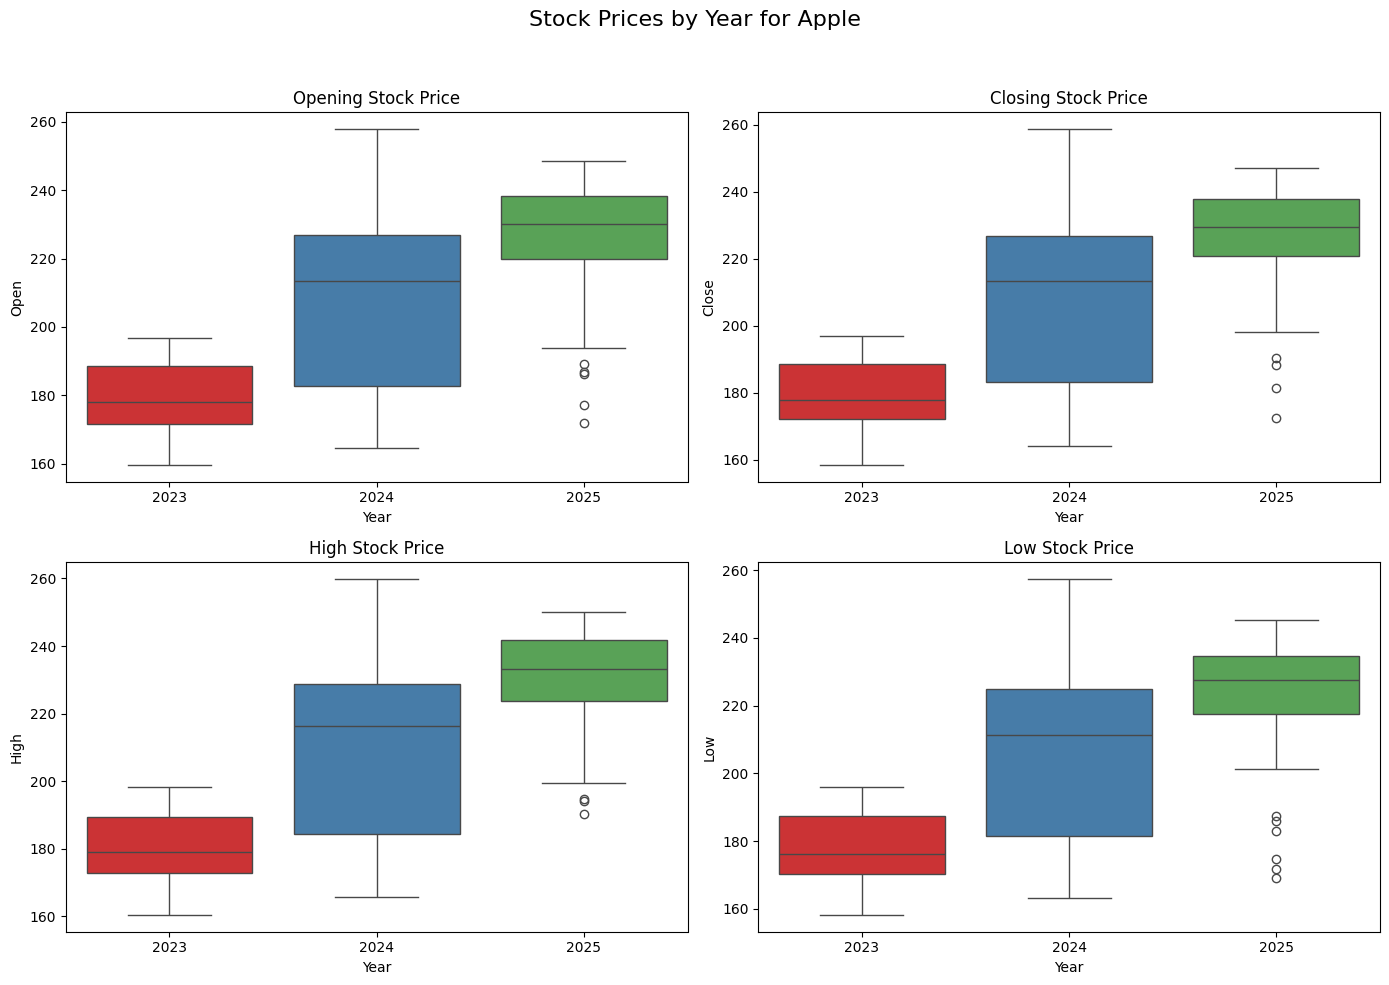

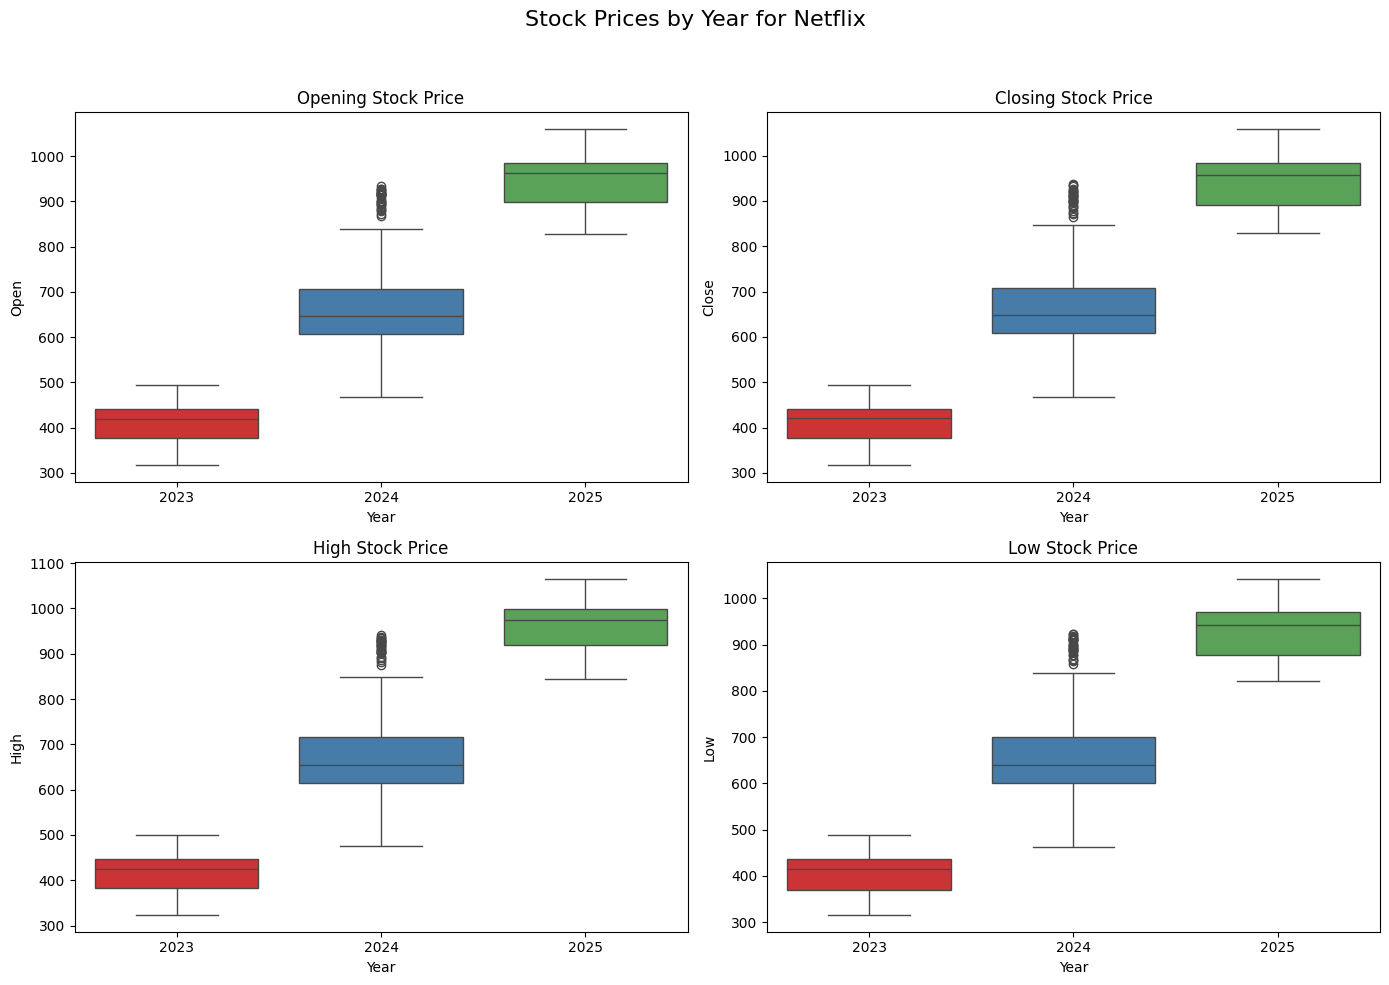

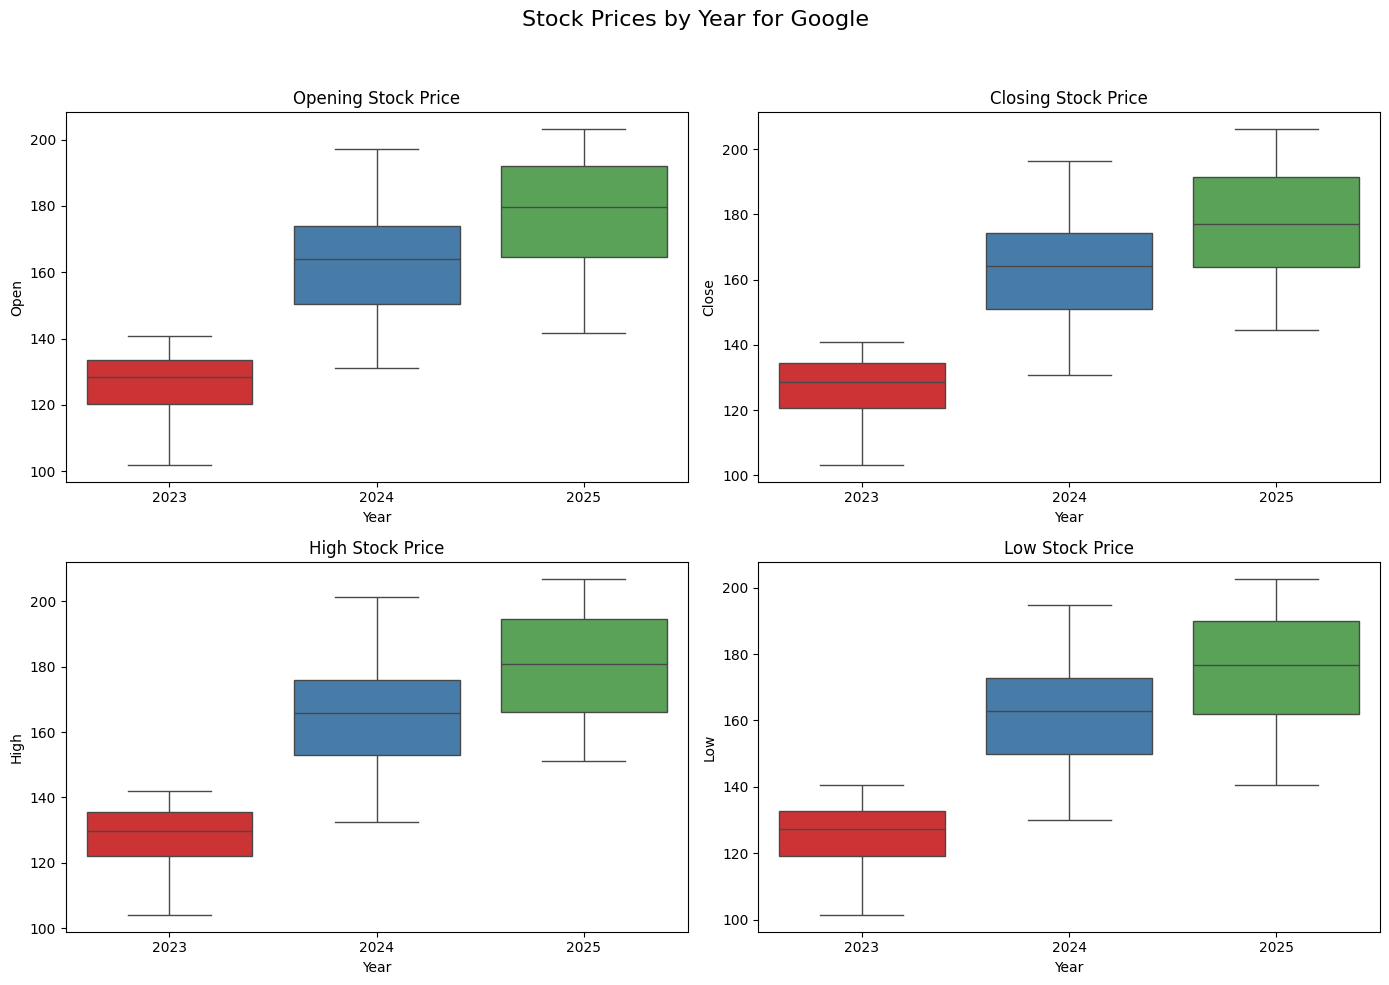

In [2]:
result_df['Year'] = result_df['Date'].dt.year.astype(str)

# Automatically create a color palette for the unique years
unique_years = sorted(result_df['Year'].unique())
palette = sns.color_palette("Set1", len(unique_years))  # bright & bold
year_palette = dict(zip(unique_years, palette))

# Plotting function
def plot_boxplots_by_year(df, company_name):
    company_df = df[df['Company Name'] == company_name]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Stock Prices by Year for {company_name}', fontsize=16)

    sns.boxplot(ax=axes[0, 0], data=company_df, x='Year', y='Open', hue='Year', palette=year_palette, legend=False)
    axes[0, 0].set_title('Opening Stock Price')

    sns.boxplot(ax=axes[0, 1], data=company_df, x='Year', y='Close', hue='Year', palette=year_palette, legend=False)
    axes[0, 1].set_title('Closing Stock Price')

    sns.boxplot(ax=axes[1, 0], data=company_df, x='Year', y='High', hue='Year', palette=year_palette, legend=False)
    axes[1, 0].set_title('High Stock Price')

    sns.boxplot(ax=axes[1, 1], data=company_df, x='Year', y='Low', hue='Year', palette=year_palette, legend=False)
    axes[1, 1].set_title('Low Stock Price')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Run the plot for all companies
for _, company in tickers.items():
    plot_boxplots_by_year(result_df, company)

# **3. Heatmap analysis to find out the stability of stock:**

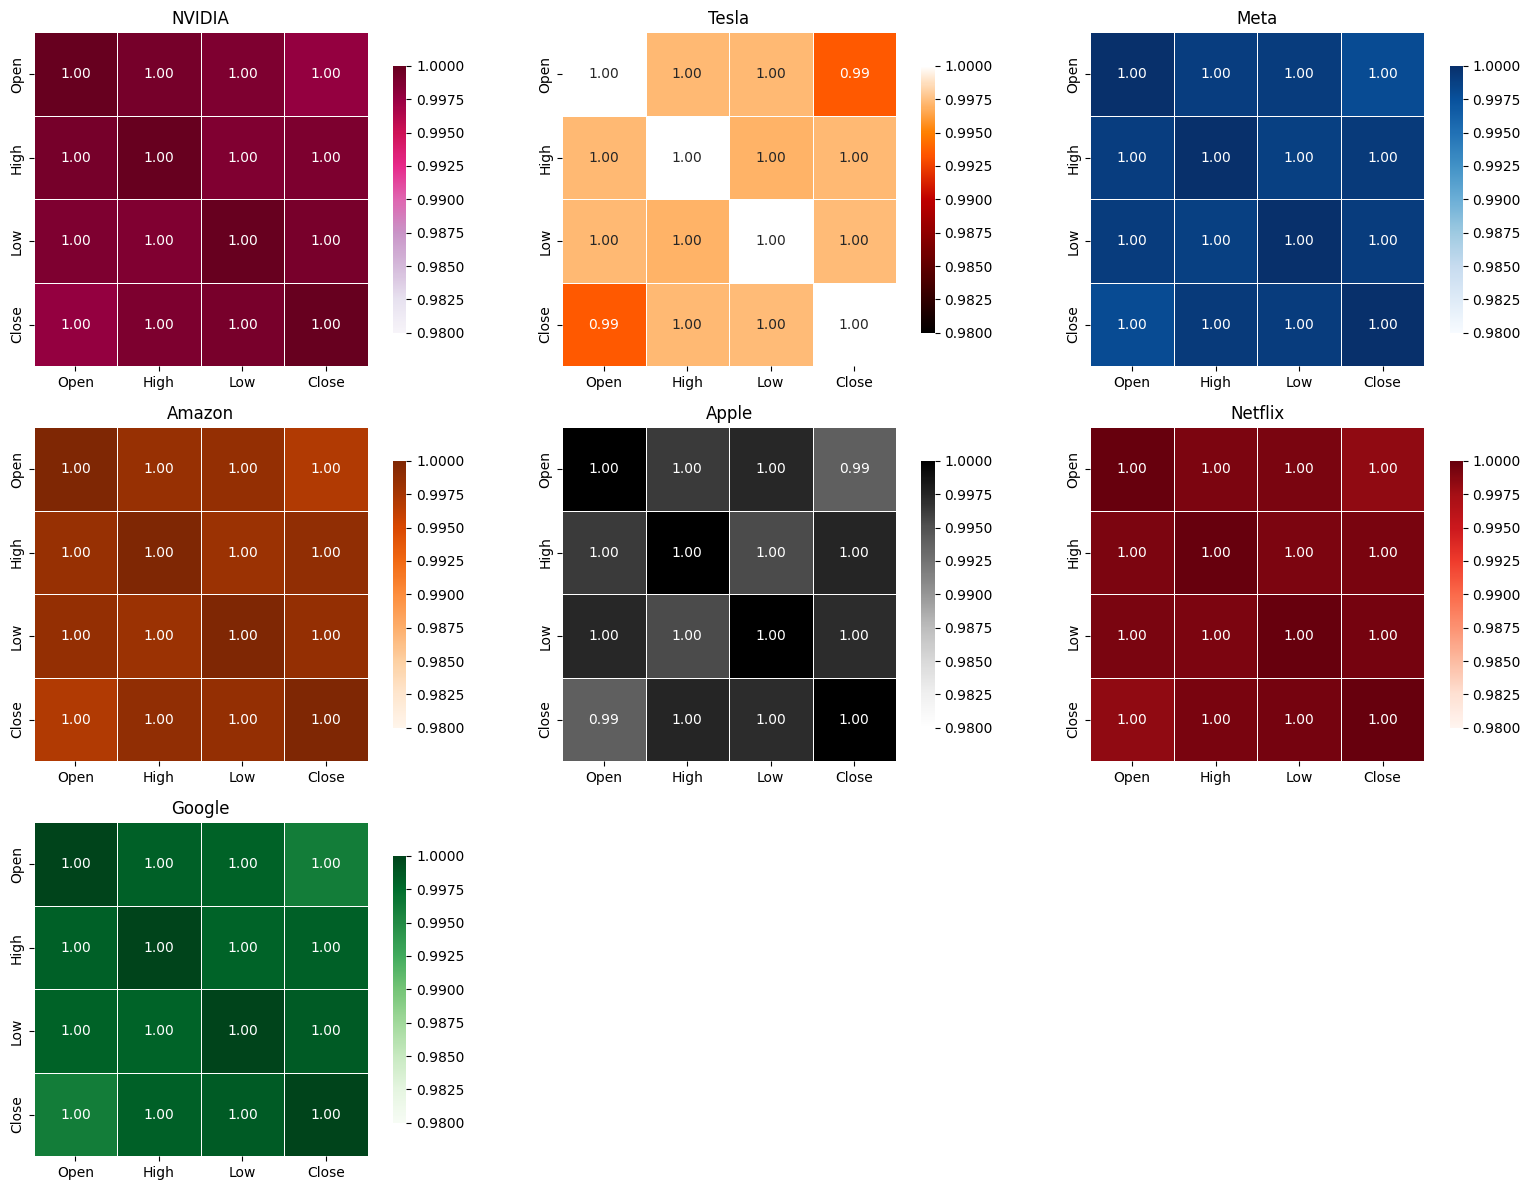

In [3]:
colormaps = {
    'Meta': 'Blues',
    'Amazon': 'Oranges',
    'Apple': 'Greys',
    'Netflix': 'Reds',
    'Google': 'Greens',
    'Tesla': 'gist_heat',     # <- updated to be clearly distinct
    'NVIDIA': 'PuRd'
}

# Function to compute correlation matrix for a company
def get_correlation_matrix(df, company_name):
    company_df = df[df['Company Name'] == company_name]
    return company_df[['Open', 'High', 'Low', 'Close']].corr()

# Create subplots
companies = list(tickers.values())  # Assuming tickers is a dict like {'META': 'Meta', ...}
num_companies = len(companies)
cols = 3
rows = (num_companies + cols - 1) // cols  # ensures enough rows

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))

for idx, company in enumerate(companies):
    row, col = divmod(idx, cols)
    ax = axes[row][col] if rows > 1 else axes[col]
    corr = get_correlation_matrix(result_df, company)
    cmap = colormaps.get(company, 'coolwarm')

    sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, square=True,
                linewidths=0.5, linecolor='white', vmin=0.98, vmax=1.0,
                cbar_kws={"shrink": .8}, ax=ax)
    ax.set_title(f'{company}', fontsize=12)

# Hide any unused subplots
for i in range(num_companies, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# **4. Collective Analysis of the Stock Price Trend:**

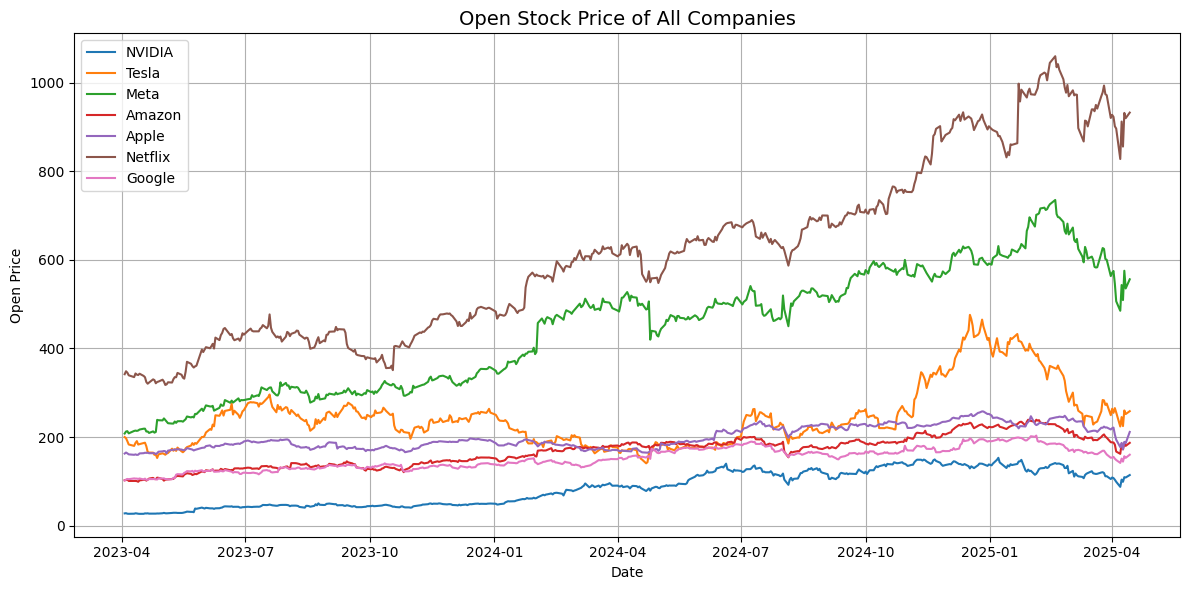

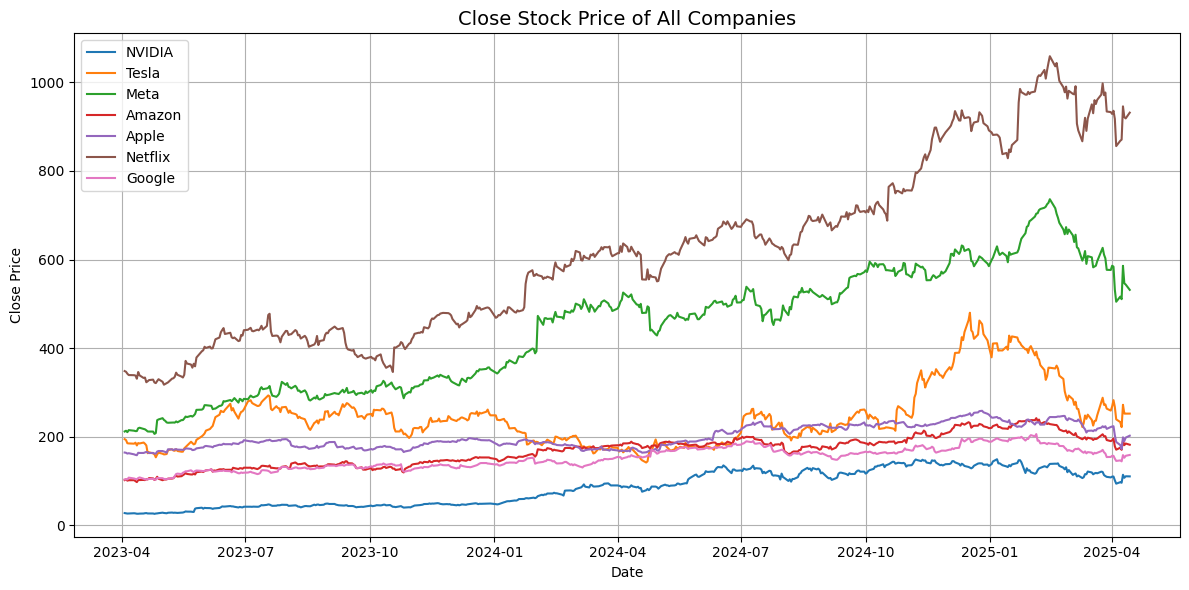

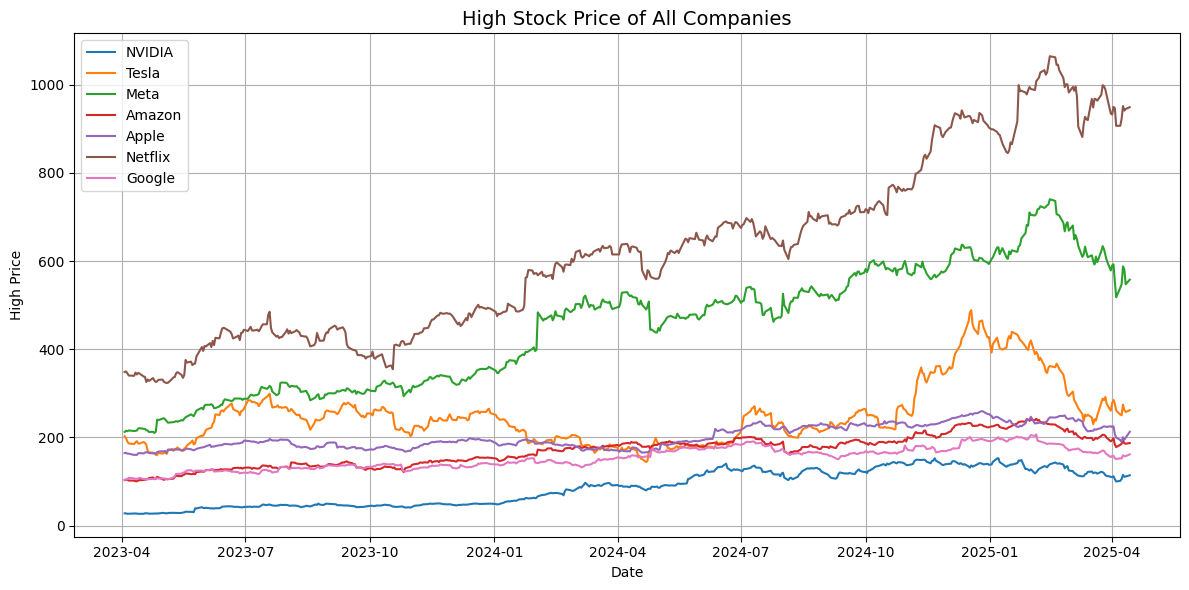

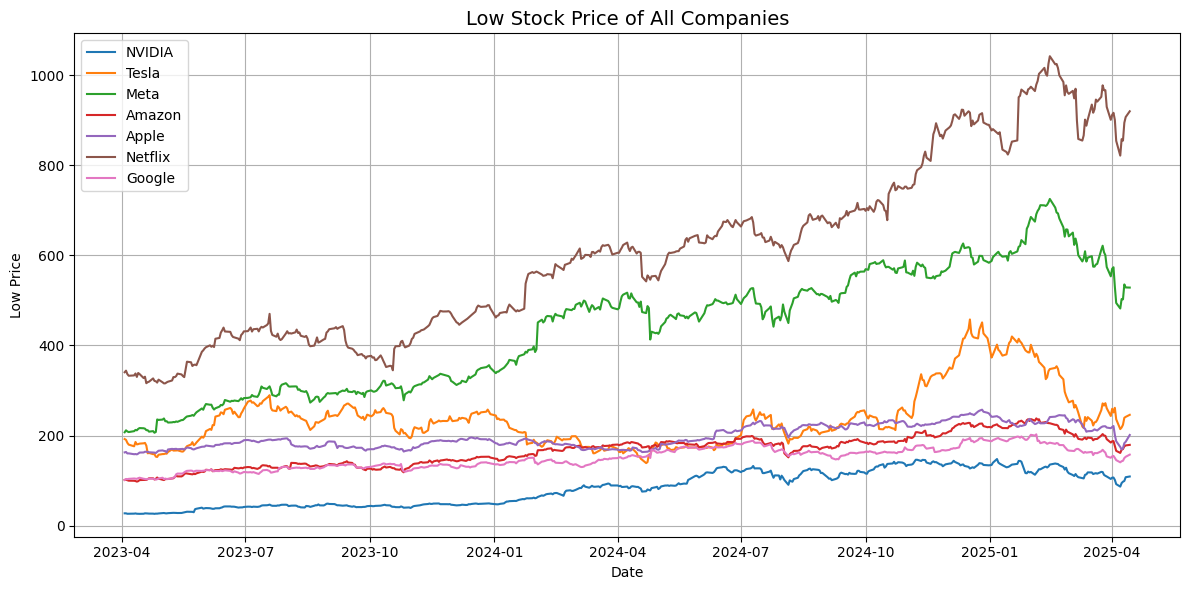

In [4]:
# Define the price columns to plot
price_types = ['Open', 'Close', 'High', 'Low']

# Loop through each price type and generate a plot
for price_type in price_types:
    plt.figure(figsize=(12, 6))

    for ticker, company in tickers.items():
        company_df = result_df[result_df['Company Name'] == company]
        plt.plot(company_df['Date'], company_df[price_type], label=company)

    plt.title(f'{price_type} Stock Price of All Companies', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(f'{price_type} Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()